In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-17 19:59:29.941071


# Luokiteltu jakauma

Määrällisen muuttujan jakaumaan tutustun luokitellun jakauman avulla. Luokitellun jakauman voin esittää frekvenssitaulukkona tai histogrammina.

In [2]:
# Numeerisen laskennan kirjastoa käytän histogrammin prosenttien laskemiseen
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# Tyylimääritys grafiikalle
plt.style.use('seaborn-white')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Määrittelen luokkarajat palkan luokittelemiseksi 
rajat = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['palkkaluokka'] = pd.cut(df['palkka'], rajat)

# Datassa on nyt viimeisimpänä muuttujana palkkaluokka
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,palkkaluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(3000, 4000]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(2000, 3000]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(1000, 2000]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(2000, 3000]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(2000, 3000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN,"(1000, 2000]"
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN,"(1000, 2000]"
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN,"(2000, 3000]"
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN,"(2000, 3000]"


In [5]:
# Palkkaluokkiin kuuluvien frekvenssit
df1 = pd.crosstab(df['palkkaluokka'], 'f')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
n = df1['f'].sum()
df1['f (%)'] = df1 / n * 100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi,
# koska dataframen sarake saa sisältää vain yhden tyyppistä tietoa!
# Nykyisissä kirjastoversioissa ei enää tarpeellinen
#df1.index = df1.index.astype(str)

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Taulukon näyttäminen siten että frekvensseissä ei desimaaleja, mutta prosenteissa yksi desimaali
df1.style.format({'f':'{:.0f}', 'f (%)':'{:.1f} %'})

,f,f (%)
palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %
Yhteensä,82,100.0 %


## Histogrammi

Histogrammi on nopein keino luokitellun jakauman tarkasteluun. Histogrammia varten ei tarvitse erikseen laskea luokiteltua jakaumaa taulukkona.

**Tärkeä huomautus!** Oletuksena **cut**-funktion tuottamat luokat eivät sisällä luokan alarajaa, mutta sisältävät luokan ylärajan. Histogrammissa taas luokat sisältävät luokkien alarajat, mutta eivät sisällä luokan ylärajaa viimeistä luokkaa lukuun ottamatta. Jos havaintoja on juuri luokkarajojen kohdalla, niin cut-funktion tuottamien luokkien frekvenssit poikkeavat histogrammin pylväiden näyttämistä frekvensseistä.

Text(0, 0.5, 'Lukumäärä, n = 82')

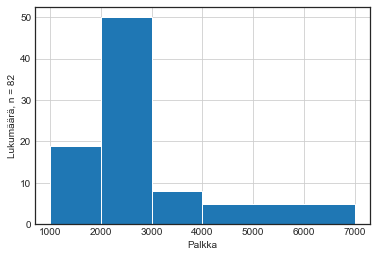

In [6]:
# Käytän edellä määriteltyjä luokkarajoja
df['palkka'].hist(bins=rajat, edgecolor='white')

# Havaintojen lukumäärä
n = df['palkka'].count()

plt.xlabel('Palkka')
plt.ylabel(f'Lukumäärä, n = {n}')

Text(0, 0.5, '%, n = 82')

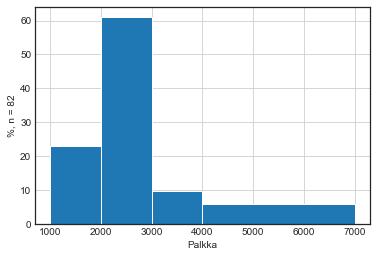

In [7]:
# np.ones kikalla prosentit hist-kaavioon
# np.ones kikka tuottaa painokertoimiksi 1/n

# Havaintojen lukumäärä
n = df['palkka'].count()

# Histogrammi, jossa y-akselilla prosentit
df['palkka'].hist(bins=rajat, weights=np.ones(n)/n*100, edgecolor='white')

plt.xlabel('Palkka')
plt.ylabel(f'%, n = {n}')

## Lisätietoa


* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
* https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    
Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/